In [1]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v3
from draw import draw  #绘图函数
import tqdm

In [2]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v3.GridWorld_v3(forbiddenAreaScore=-10, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


In [3]:
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]

In [4]:
action_values = np.random.rand(25,5)
learning_rate = 0.01
gamma = 0.99

  0%|                                                                               | 0/100 [00:00<?, ?it/s]

➡️➡️🔄⬅️⬅️
⬇️⏬⏫️➡️⬅️
➡️🔄⏬🔄⬆️
⬆️⏩️✅⏪⬇️
⬆️⏪⬆️➡️⬅️


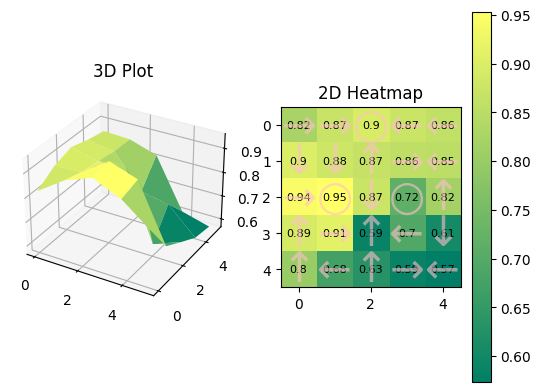

 20%|██████████████                                                        | 20/100 [00:03<00:10,  7.61it/s]

➡️➡️➡️➡️⬇️
⬆️⏫️⏩️➡️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


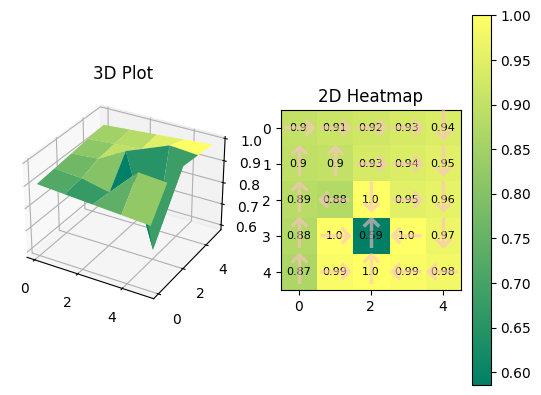

 40%|████████████████████████████                                          | 40/100 [00:06<00:07,  7.63it/s]

➡️➡️➡️➡️⬇️
⬆️⏫️⏩️➡️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


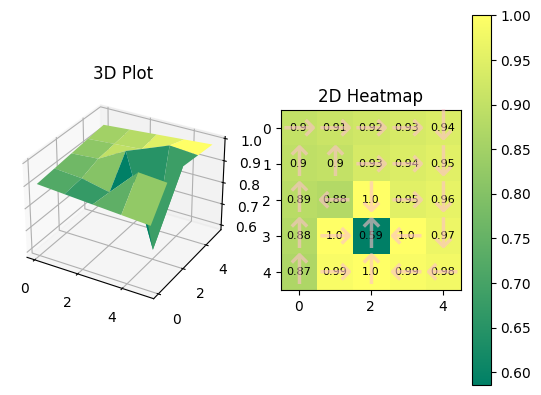

 60%|██████████████████████████████████████████                            | 60/100 [00:09<00:05,  7.56it/s]

➡️➡️➡️➡️⬇️
⬆️⏫️⏩️➡️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


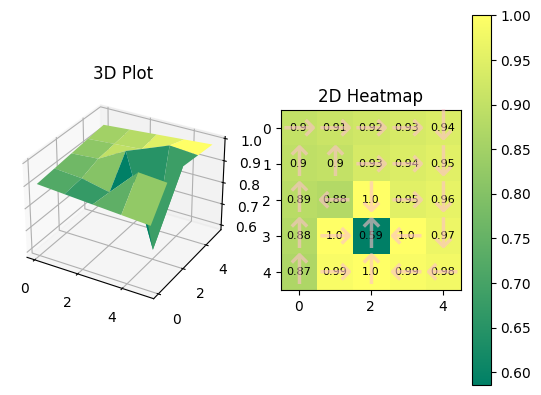

 80%|████████████████████████████████████████████████████████              | 80/100 [00:12<00:02,  7.54it/s]

➡️➡️➡️➡️⬇️
⬆️⏫️⏩️➡️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


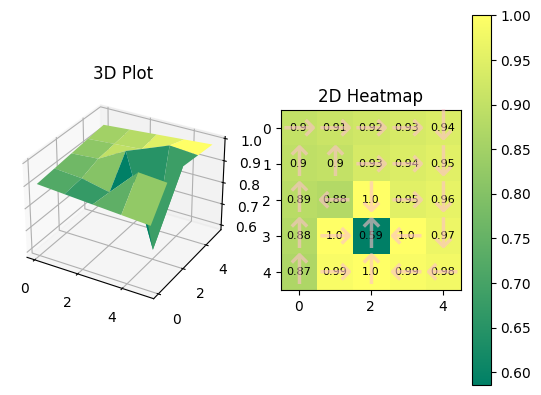

100%|█████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.39it/s]


In [5]:
for _ in tqdm.tqdm(range(100)):
    for i in range(len(episodes)):
        for j in range(len(episodes[i])-1,-1,-1):
            trajectory = episodes[i][j]
            tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = trajectory
            
            next_action_value = action_values[nextState].max()
            target = tmpscore + (1.0 - terminal) * gamma * next_action_value
            TD_error = action_values[tmpstate][tmpaction] - target
            
            action_values[tmpstate][tmpaction] -= learning_rate * TD_error

    if _ % 20 == 0:
        policy = np.eye(5)[np.argmax(action_values,axis=1)]
        gridworld.showPolicy(policy)
    
        state_values = np.max(action_values,axis=1)
        p = np.argmax(action_values,axis=1)
        draw(state_values.reshape(5,5), p)